## 

## Course: Unibz - Programming and Visualisation for Data Analytics - Programming for Data Analytics - 2020/21 - 73047B
## Student: Marcelo Eduardo Redoschi 
## Date: 9 January 2021

---

## Allegheny County's Bureau of Weights and Measures
### Part 1: Devices

### Introduction

As mentioned in the preliminary report, the motivation for this project was to apply some of the concepts learned during class to analyze data from a public sector context, as an illustrative example.  

After some research, I had identified an interesting [dataset](https://data.wprdc.org/dataset/allegheny-county-weights-and-measures-inspections), from a North-American context.  It was made available by [Allegheny County's Bureau of Weights and Measures](https://www.alleghenycounty.us/weights-measures/index.aspx), located in the state of Pennsylvania. 

As stated in their website, the goal of that local agency is to protect consumers as well as to ensure fairness to businesses competing in the marketplace.  It aims, for instance, to reduce fraud and mitigate faulty equipment weights and measurement readings.

**For the purposes of this (Python) notebook, the work was concentrated on the *devices* dataset.**

Part 2 will consist of a separate and independent R notebook, to be presented for the other module, concentrated on the *stores* dataset*.
    

---

### Necessary preliminary step: import required libraries, set matplot to display graphs within the notebook itself.

In [1]:
%matplotlib inline
import os, sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


### Data directory definitions

In [2]:
data_dir=os.path.join(os.getcwd(),"data")
import_dir_path=os.path.join(data_dir,"import")
export_dir_path=os.path.join(data_dir,"export")

print(data_dir)
paths=[import_dir_path, export_dir_path]

print(os.listdir(data_dir))

for folder in paths: 
    print("\n{}".format(folder))
    print(os.listdir(folder))

/mnt/reserve/repositories/course_project_allegheny_county_data_analysis/data
['export', 'import']

/mnt/reserve/repositories/course_project_allegheny_county_data_analysis/data/import
['stores.csv', 'inspections.csv', 'devices.csv', 'weights-measures-data-dictionary.csv']

/mnt/reserve/repositories/course_project_allegheny_county_data_analysis/data/export
['devices_R.csv']


While it is currently empty, the idea is that the curated devices information will be "exported" as CSV and placed in the above folder, just before finishing this notebook.  

*That is, for later import into the R notebook (Part 2), in case needed.*  

---

### Helper functions
*Defined for clarity and convenience.*

In [3]:
def freq_table(df, col_name):
    v=df[col_name] # vector, series 
    return v.value_counts()

In [4]:
def perc_freq_table(df, col_name):
    num_rows=sum(freq_table(df,col_name))
    return freq_table(df, col_name)/num_rows*100

In [5]:
def uppercased(df, col_name): 
    return df[col_name].str.upper()

---

### Data dictionary (provided by the institution)

With the data directories properly set, we can go ahead and start to import the CSV files.

As a preliminary step, let us take a look at the **data dictionary** provided, in order to
better contextualize the work performed.

In [6]:
data_dictionary_fname="weights-measures-data-dictionary.csv"
data_dict_full_path=os.path.join(import_dir_path,data_dictionary_fname)
data_dict = pd.read_csv(data_dict_full_path)
data_dict

,Table,Field Name,Description
0,Stores,StoreID,ID number of the store
1,Stores,StoreName,Name of the store
2,Stores,Address,Street address
3,Stores,MailingCity,City
4,Stores,State,State
5,Stores,Zip,Zip code
6,Stores,CorpID,Internal use code
7,Stores,Neighborhood,City of Pittsburgh neighborhood
8,Stores,BusinessPhone,Phone number
9,Stores,AlternatePhone,Other phone number


### Reading carefully, we are able to observe that the spreadsheets (csv files) refer to three tables.

*For completeness, we could also verify this programmatically (such an approach could come in handy, in case of larger data dictionaries).*

In [7]:
checkmark="\u2713"
table_names=data_dict["Table"].unique()
for name in table_names: 
    print(name+checkmark)

Stores✓
Devices✓
Inspections✓


*As explained previously, for the purposes of this notebook, we'll focus on the **devices** data.*

### Devices - data dictionary

In [8]:
device_table_dict=data_dict.loc[data_dict['Table'] == "Devices"]
device_table_dict.drop(columns=['Table'])

,Field Name,Description
20,DeviceID,ID number of the device
21,StoreID,ID number of the store
22,DeviceType,"Type of device (gasoline, jewelry scale, etc)"
23,DeviceGroup,"Group of device (fuel, timing, scale, or misce..."
24,Make,"Brand of scale, pump etc."
25,Model,"Model of scale, pump etc."
26,SerialNumber,Serial number
27,Pump,Pump number
28,Grade,Fuel grade
29,Capacity,Capacity of pump or scale


In [9]:
print("Number of fields in devices data dictionary: {}".format(device_table_dict.shape[0]))

Number of fields in devices data dictionary: 12


*With this information firmly in mind, we may then proceed to try and import the devices data per se.*

### Devices - CSV import

In [10]:
devices_fname="devices.csv"
devices_full_path=os.path.join(import_dir_path,devices_fname)
devices = pd.read_csv(devices_full_path)

If we didn't get any errors, we should be able to "query" information about the data, just to double check that the information was succesfully imported.  

In [11]:
print("Devices data rows and columns: {}".format(devices.shape))

Devices data rows and columns: (30778, 12)


*For simplicity and clarity we may rename some attribute (feature) names.*

In [12]:
devices=devices.rename(columns={"device_id": "id", "device_group": "group","device_type":"type"})

### Devices - data exploration

A nice function to use is *describe*, here shown with an appropriate option (argument) to exclude the numerical (id) fields.  This should help us focus on the most import features.

#### Dataframe description

In [13]:
devices.describe(exclude=[np.number]) # exclude the numerical (id) fields.

,type,group,make,model,serial_number,pump,grade,capacity,remarks
count,30778,30778,30320,8971,30595,17745,12278,6844,10350
unique,45,8,422,3287,16560,598,75,139,4697
top,PARKING METER,TIMING,GILBARCO,5090-1,NSN,1,R-87,30 LB,REJECTED
freq,10568,10974,6352,1501,481,1644,3526,5233,483


In a quick first look, the *feature* with the smallest number of *supposedly unique* values is **group**, with 8.  While manageably small, it is always good to double check.

#### First few data rows
To get an initial "feeling" for the dataset, we may try and display the first few, let us say 30 rows, like so:

In [14]:
devices.head(30)

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
0,1,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406953,1,S-93,NaN,NaN,0
1,2,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406953,2,S-93,NaN,NaN,0
2,3,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406954,3,S-93,NaN,NaN,0
3,4,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406954,4,S-93,NaN,NaN,0
4,5,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406955,5,S-93,NaN,NaN,0
5,6,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406955,6,S-93,NaN,NaN,0
6,7,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406956,7,S-93,NaN,NaN,0
7,8,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406956,8,S-93,NaN,NaN,0
8,9,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406957,9,S-93,NaN,NaN,0
9,10,33113,GASOLINE,FUEL DISPENSER,GILBARCO,NaN,406957,10,S-93,NaN,NaN,0


We notice that **FUEL DISPENSER** is one of the groups.  Let's try and find out what the other (at most 7) are.  
A possible, and also informative way to get this is via a *frequency table*.  

*For convenience, I'll use the predefined helper function.*

In [15]:
device_groups_freq_table=freq_table(devices, "group")
device_groups_freq_table

TIMING            10974
FUEL DISPENSER     9335
SCALE              6538
Fuel Dispenser     2880
Scale               551
Timing              478
MISCELLANEOUS        20
Miscellaneous         2
Name: group, dtype: int64

In [16]:
len(device_groups_freq_table)

8

We do get eight records, the same information provided by the describe function.  However, we now know that this data needs to be adjusted.  In reality there are four distinct categories, if we include "miscellaneous".  

In order to circumvent this, we can use a simple programming 'trick'.  That is, to uppercase all records in a given column.  For convenience and possible reusability, this functionality was placed on its own helper function.   

*So without further ado, let us try and adjust it.*

In [17]:
devices["group"]=uppercased(devices, "group")
freq_table(devices, "group")

FUEL DISPENSER    12215
TIMING            11452
SCALE              7089
MISCELLANEOUS        22
Name: group, dtype: int64

*Wow! It worked!*

In other words, by applying *uppercased*, we made the *device_group* attribute *tidy*. 
We could try and get a relative frequency, in terms of the percentages to get a better feel for each category.

In [18]:
device_groups_distribution=perc_freq_table(devices, "group")
device_groups_distribution

FUEL DISPENSER    39.687439
TIMING            37.208396
SCALE             23.032686
MISCELLANEOUS      0.071480
Name: group, dtype: float64

Or perhaps a graph.

In [19]:
main_device_groups=device_groups_distribution.head(3)

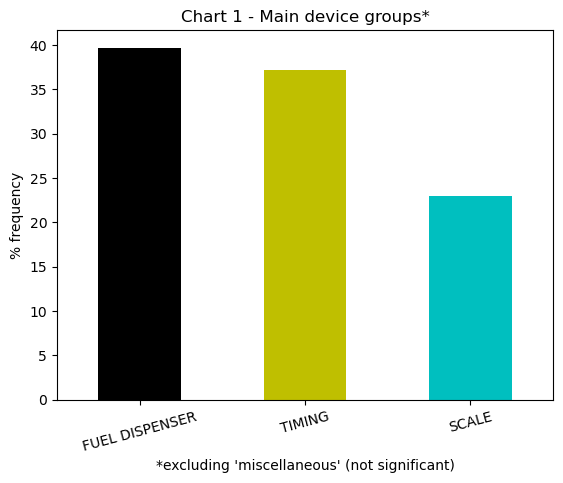

In [20]:
chart1=main_device_groups.plot(kind='bar', color = list('kycrgb'))
chart1.set_title('Chart 1 - Main device groups*')
chart1.set_ylabel("% frequency")
chart1.set_xlabel("*excluding 'miscellaneous' (not significant)")
chart1.tick_params(axis='x', rotation=15)

Approximately 40% of devices are **fuel dispensers**, which we assume are going to be present only in gas (service) stations.
And **miscellaneous** has such a small proportion that it was filtered out for display purposes.

For the sake of completeness, let us try and look this miscellaneous group in more detail.

In [21]:
misc_devices=devices.loc[devices['group'] == "MISCELLANEOUS"]
misc_devices

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
9996,9972,32920,Miscellaneous Device,MISCELLANEOUS,NaN,NaN,2046,A-1,NaN,NaN,NaN,0
9997,9973,32920,Miscellaneous Device,MISCELLANEOUS,NaN,NaN,2046,V-1,NaN,NaN,NaN,0
20461,18726,40000,MISCELLANEOUS DEVICE,MISCELLANEOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26033,27851,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,MASTER,NaN,710346,NaN,NaN,NaN,30 FT TAPE,0
26034,27852,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,PITTSBURGH,NaN,6254,NaN,NaN,NaN,33 FT TAPE,0
26035,27853,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,STANLEY,NaN,NSN,NaN,NaN,NaN,25 FT TAPE,0
26036,27854,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,OHIO FORGE,NaN,32800,NaN,NaN,NaN,25 FT TAPE,0
26037,27855,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,WHEEL,NaN,NSN,NaN,NaN,NaN,100 FT WHEEL TAPE,0
26039,27857,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,STANLEY,NaN,NSN,NaN,NaN,NaN,25 FT TAPE,0
26040,27858,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,STANLEY LEVERLOCK,NaN,NSN,NaN,NaN,NaN,30 FT TAPE,0


Incidentally, we notice that the *type* feature ought to be uppercased too.  

In [22]:
devices["type"]=uppercased(devices, "type")

We further noticed that there were some *NaN* values.  This can be additionally confirmed using the count() function, thusly:

In [23]:
misc_devices.count()

id               22
store_id         22
type             22
group            22
make             19
model             1
serial_number    21
pump              2
grade             0
capacity          0
remarks          18
deleted          22
dtype: int64

Sometimes users enter important business information into the *comment* or *remark* (spreadsheet or database) columns. 

In [24]:
misc_devices.remarks

9996                        NaN
9997                        NaN
20461                       NaN
26033                30 FT TAPE
26034                33 FT TAPE
26035                25 FT TAPE
26036                25 FT TAPE
26037         100 FT WHEEL TAPE
26039                25 FT TAPE
26040                30 FT TAPE
26041                33 FT TAPE
26042               100 FT TAPE
26043               100 FT TAPE
26044    6"5' TAPE GOOD TO 6 FT
26045                       NaN
26270    6"5' TAPE GOOD TO 6 FT
26271    6"5' TAPE GOOD TO 6 FT
29286        50 FT TAPE MEASURE
29287        50 FT TAPE MEASURE
29288        50 FT TAPE MEASURE
29541        50 FT TAPE MEASURE
29542        50 FT TAPE MEASURE
Name: remarks, dtype: object

With a quick visual inspection we notice that there are four empty remarks, and the others (18)
all have to do with some kind of *tape*.  The command *dropna* filters out the empty rows, for display purposes that is.  The information is still there, in the original dataframe.

In [25]:
misc_devices.remarks.dropna(axis='rows')

26033                30 FT TAPE
26034                33 FT TAPE
26035                25 FT TAPE
26036                25 FT TAPE
26037         100 FT WHEEL TAPE
26039                25 FT TAPE
26040                30 FT TAPE
26041                33 FT TAPE
26042               100 FT TAPE
26043               100 FT TAPE
26044    6"5' TAPE GOOD TO 6 FT
26270    6"5' TAPE GOOD TO 6 FT
26271    6"5' TAPE GOOD TO 6 FT
29286        50 FT TAPE MEASURE
29287        50 FT TAPE MEASURE
29288        50 FT TAPE MEASURE
29541        50 FT TAPE MEASURE
29542        50 FT TAPE MEASURE
Name: remarks, dtype: object

We notice the devices above are all some kind of *tape*.  So let's try and group them in a category of their own.  

In [26]:
devices_to_be_grouped_into_tape=devices.loc[(devices.group=="MISCELLANEOUS"), ('group', 'remarks')].dropna(axis='rows')

In [27]:
devices_to_be_grouped_into_tape

,group,remarks
26033,MISCELLANEOUS,30 FT TAPE
26034,MISCELLANEOUS,33 FT TAPE
26035,MISCELLANEOUS,25 FT TAPE
26036,MISCELLANEOUS,25 FT TAPE
26037,MISCELLANEOUS,100 FT WHEEL TAPE
26039,MISCELLANEOUS,25 FT TAPE
26040,MISCELLANEOUS,30 FT TAPE
26041,MISCELLANEOUS,33 FT TAPE
26042,MISCELLANEOUS,100 FT TAPE
26043,MISCELLANEOUS,100 FT TAPE


In [28]:
for indx in devices_to_be_grouped_into_tape.index:
    devices.at[indx, 'group'] = "TAPE"

freq_table(devices,"group")

FUEL DISPENSER    12215
TIMING            11452
SCALE              7089
TAPE                 18
MISCELLANEOUS         4
Name: group, dtype: int64

Indeed, the miscellaneous group records were reduced to just 4.  For completeness, let's look at them.

In [29]:
remaining_misc_devices=devices.loc[(devices.group=="MISCELLANEOUS"),]
remaining_misc_devices

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
9996,9972,32920,MISCELLANEOUS DEVICE,MISCELLANEOUS,NaN,NaN,2046,A-1,NaN,NaN,NaN,0
9997,9973,32920,MISCELLANEOUS DEVICE,MISCELLANEOUS,NaN,NaN,2046,V-1,NaN,NaN,NaN,0
20461,18726,40000,MISCELLANEOUS DEVICE,MISCELLANEOUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
26045,27865,40466,MISCELLANEOUS DEVICE,MISCELLANEOUS,LASER BEAM,LEICA,10477,NaN,NaN,NaN,NaN,0


I think we can safely remove those records from our analysis.

In [30]:
devices=devices.drop(index=remaining_misc_devices.index).copy() # .copy() is needed, due to technical considerations. 

In [31]:
freq_table(devices,"group")

FUEL DISPENSER    12215
TIMING            11452
SCALE              7089
TAPE                 18
Name: group, dtype: int64

#### We notice that there is an attribute *deleted* which, according to the data dictionary provided denotes obsolete equipment.  Whenever needed, we could filter for that attribute and just work on *current* devices.  

*For illustrative purposes, we could proceed as seen in the cells below...*

In [32]:
obsolete_devices=devices.loc[(devices.deleted==1),]
obsolete_devices.count()

id               3028
store_id         3028
type             3028
group            3028
make             3022
model             764
serial_number    3019
pump             1904
grade             445
capacity         1777
remarks           950
deleted          3028
dtype: int64

In [33]:
current_devices=devices.loc[(devices.deleted!=1),]
current_devices.count()

id               27746
store_id         27746
type             27746
group            27746
make             27297
model             8206
serial_number    27573
pump             15839
grade            11833
capacity          5067
remarks           9400
deleted          27746
dtype: int64

In [34]:
freq_table(current_devices,"remarks")

EXTRA                              472
REJECTED                           427
INVENTORIED EXTRA                  278
LOT #2                             118
LOT #5                             108
                                  ... 
FIFTH AVE NORTH 5N45                 1
FIFTH AVE NORTH 5N46                 1
FIFTH AVE  NORTH 5N47                1
FIFTH AVE NORTH 5N48 - REJECTED      1
4-N-22                               1
Name: remarks, Length: 4507, dtype: int64

In [35]:
perc_freq_table(current_devices,"remarks")[0:10]


EXTRA                5.021277
REJECTED             4.542553
INVENTORIED EXTRA    2.957447
LOT #2               1.255319
LOT #5               1.148936
MAIN & 13TH LOT      0.989362
BROWNSVILLE RD       0.968085
BROADWAY             0.797872
BROAD ST             0.787234
BRADDOCK AVE         0.765957
Name: remarks, dtype: float64

Now, let us go back to **all** devices (i.e. except for the 4 records which were still grouped as *miscellaneous*).
As part of this continuing exploration, we may try to compute a percent frequency table for the **device types**.

In [36]:
device_types_perc_freq_table=perc_freq_table(devices,"type")
device_types_perc_freq_table

GASOLINE                          36.716059
PARKING METER                     35.058816
DIGITAL                           17.167089
PLATFORM                           3.675180
DIESEL                             2.638591
AIR/VACUUM HOSE                    1.260805
JEWELRY SCALE                      1.195815
LAUNDRY DRYER                      0.893611
MISC. SCALE                        0.253461
KEROSENE                           0.194970
COUNTER                            0.165724
EVEN-BAL                           0.113732
HANGER                             0.110483
ETHANOL                            0.103984
PLATFORM - PROPANE                 0.100734
COMPUTING                          0.071489
MISCELLANEOUS DEVICE               0.058491
POSTAL                             0.045493
BEAM                               0.035744
DRUM                               0.032495
WHEEL                              0.032495
TAPE MEASURE                       0.032495
OFF-ROAD DIESEL (HOME HEATING)  

In [37]:
device_type_names=devices.type.sort_values().unique()

In [38]:
len(device_type_names)

26

As we can see, there are many device types.  Including **PLATFORM** and **PLATFORM - PROPANE**.

In [39]:
platform_mask = devices.type=='PLATFORM'
platform_devices=devices.loc[platform_mask]
num_platform_devices=len(platform_devices)
print("Number of platform devices: {}".format(num_platform_devices))
platform_devices

Number of platform devices: 1131


,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
1243,16572,32163,PLATFORM,SCALE,METTLER,NaN,560316145,MT,NaN,30 LB,NaN,0
1387,16076,40117,PLATFORM,SCALE,AVERY BERKEL,NaN,130646,2,NaN,10 LB,NaN,0
1615,16103,40119,PLATFORM,SCALE,BRECKNELL,NaN,NSN,NaN,NaN,15 LB,2,0
3058,16544,30319,PLATFORM,SCALE,METTLER,NaN,439087135,1,NaN,30 LB,NaN,0
4551,15187,32674,PLATFORM,SCALE,AND,NaN,3912545,NaN,NaN,300 LB,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30696,31343,32173,PLATFORM,SCALE,RICE LAKE,NaN,74039,5,NaN,500 LB,NaN,0
30697,31344,32173,PLATFORM,SCALE,RICE LAKE,NaN,6,6,NaN,500 LB,74041,0
30719,31182,40433,PLATFORM,SCALE,RUBBERMAID,NaN,003827,NaN,NaN,150 LB,NaN,0
30732,31165,30557,PLATFORM,SCALE,MAGELLAN,NaN,6970967,CURB,NaN,30 LB,NaN,0


By looking at the data above, we can infer that those are "unspecified", (i.e. not propane or some other other category), platform scales.  To make this information more explicit, we could make use of the *grade* attribute (since most appear to be currently empty *NaN*).  This would allow us to properly differentiate them from the rarer (in the context of the raw dataset as provided) propane scales.  

In [40]:
platform_devices.grade.dropna()

10562    DIGITAL
11024    PROPANE
11918    4691310
12968    PROPANE
Name: grade, dtype: object

In [41]:
platform_devices_with_grade=platform_devices.grade.dropna().index

In [42]:
# https://stackoverflow.com/questions/23745677/filtering-pandas-data-frame-by-a-list-of-ids
platform_devices_ok=devices[devices.index.isin(platform_devices_with_grade)]
platform_devices_ok
num_platform_devices_ok=len(platform_devices_ok)

In [43]:
platform_devices_to_fix_indices=~platform_devices.index.isin(platform_devices_with_grade)
platform_devices_to_fix=platform_devices[platform_devices_to_fix_indices]
num_platform_devices_to_fix=len(platform_devices_to_fix)
platform_devices_to_fix

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
1243,16572,32163,PLATFORM,SCALE,METTLER,NaN,560316145,MT,NaN,30 LB,NaN,0
1387,16076,40117,PLATFORM,SCALE,AVERY BERKEL,NaN,130646,2,NaN,10 LB,NaN,0
1615,16103,40119,PLATFORM,SCALE,BRECKNELL,NaN,NSN,NaN,NaN,15 LB,2,0
3058,16544,30319,PLATFORM,SCALE,METTLER,NaN,439087135,1,NaN,30 LB,NaN,0
4551,15187,32674,PLATFORM,SCALE,AND,NaN,3912545,NaN,NaN,300 LB,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30696,31343,32173,PLATFORM,SCALE,RICE LAKE,NaN,74039,5,NaN,500 LB,NaN,0
30697,31344,32173,PLATFORM,SCALE,RICE LAKE,NaN,6,6,NaN,500 LB,74041,0
30719,31182,40433,PLATFORM,SCALE,RUBBERMAID,NaN,003827,NaN,NaN,150 LB,NaN,0
30732,31165,30557,PLATFORM,SCALE,MAGELLAN,NaN,6970967,CURB,NaN,30 LB,NaN,0


In [44]:
print((num_platform_devices_to_fix+num_platform_devices_ok)==(num_platform_devices))


True


In [45]:
platform_devices.grade.sort_values().unique()

array(['4691310', 'DIGITAL', 'PROPANE', nan], dtype=object)

In [46]:
# Ordinarily, if we pass in Z it would not match anything, but with the na=True flag, we are able to get the records we need to fix, in an alternative fashion.
mask=(devices.grade.str.contains('Z', na=True)) & (devices.type == 'PLATFORM')
devices.loc[mask,'grade']='GENERIC'

In [47]:
platform_mask = devices.type=='PLATFORM'
platform_devices=devices.loc[platform_mask]
platform_devices.grade.value_counts()

GENERIC    1127
PROPANE       2
DIGITAL       1
4691310       1
Name: grade, dtype: int64

In [48]:
propane_mask = devices.type.str.contains('PROPANE', na=False)
propane_devices=devices.loc[propane_mask]
num_propane_devices=len(propane_devices)
print("Number of propane devices: {}".format(num_propane_devices))
propane_devices[["type","group","make","grade"]]

Number of propane devices: 31


,type,group,make,grade
10459,PLATFORM - PROPANE,SCALE,METTLER,NaN
10520,PLATFORM - PROPANE,SCALE,FAIRBANKS,PROPANE
10689,PLATFORM - PROPANE,SCALE,DETECTO,PROPANE
10690,PLATFORM - PROPANE,SCALE,FAIRBANKS,PROPANE
10780,PLATFORM - PROPANE,SCALE,METTLER-TOLEDO,PROPANE
12518,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN
12606,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN
12607,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN
13083,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN
13958,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN


In [49]:
devices.loc[propane_mask,'grade']='PROPANE'
propane_devices=devices.loc[propane_mask]
propane_devices

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
10459,10431,31508,PLATFORM - PROPANE,SCALE,METTLER,NaN,7717439,NaN,PROPANE,1000 LB,NaN,0
10520,10492,31775,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,11888,NaN,PROPANE,1000 LB,NaN,0
10689,10662,31518,PLATFORM - PROPANE,SCALE,DETECTO,NaN,306616,NaN,PROPANE,1000 LB,NaN,0
10690,10663,31598,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,100087,NaN,PROPANE,500 LB,NaN,0
10780,10754,31789,PLATFORM - PROPANE,SCALE,METTLER-TOLEDO,NaN,7715057,NaN,PROPANE,1000 LB,NaN,0
12518,12510,31509,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,100087,NaN,PROPANE,1000 LB,NaN,0
12606,12599,30461,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,228360,NaN,PROPANE,1000 LB,NaN,0
12607,12600,31655,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,10339,NaN,PROPANE,1000 LB,NaN,0
13083,13081,31689,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,00566,NaN,PROPANE,1000 LB,NaN,0
13958,13971,31507,PLATFORM - PROPANE,SCALE,FAIRBANKS,NaN,M10301200067,NaN,PROPANE,1000 LB,NaN,0


In [50]:
mask = devices.type.str.contains('PLATFORM', na=False)
platform_devices=devices.loc[mask]
devices.loc[mask].value_counts(["type","grade"])

type                grade  
PLATFORM            GENERIC    1127
PLATFORM - PROPANE  PROPANE      31
PLATFORM            PROPANE       2
                    4691310       1
                    DIGITAL       1
dtype: int64

In [51]:
devices.loc[mask,'type']='PLATFORM'
devices.loc[mask].value_counts(["type","grade"])

type      grade  
PLATFORM  GENERIC    1127
          PROPANE      33
          4691310       1
          DIGITAL       1
dtype: int64

In [52]:
most_common_device_types=device_types_perc_freq_table[0:9]

In [53]:
sum(most_common_device_types)

98.85942678884774

The 10 most prevalent device types comprise almost 99% of the observed 'population'.

In [54]:
most_common_device_types

GASOLINE           36.716059
PARKING METER      35.058816
DIGITAL            17.167089
PLATFORM            3.675180
DIESEL              2.638591
AIR/VACUUM HOSE     1.260805
JEWELRY SCALE       1.195815
LAUNDRY DRYER       0.893611
MISC. SCALE         0.253461
Name: type, dtype: float64

The two most common devices are *gasoline* (it is obvious from the context they mean pumps) and *parking meters*.  Next on the list there are some *digital* devices.  But what exactly does this mean?  Let's try and find out...  

In [55]:
mask = devices.type.str.contains('DIGITAL', na=False)
devices.loc[mask]

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
231,16102,31998,DIGITAL,SCALE,ISHIDA,NaN,041070,PR,NaN,30 LB,NaN,1
1233,16557,32163,DIGITAL,SCALE,DATALOGIC,NaN,69117,12,NaN,30 LB,NaN,1
1234,16558,32163,DIGITAL,SCALE,DATALOGIC,NaN,68477,CS-1,NaN,30 LB,NaN,1
1235,16559,32163,DIGITAL,SCALE,DATALOGIC,NaN,68972,CS-2,NaN,30 LB,NaN,1
1236,16560,32163,DIGITAL,SCALE,METTLER,NaN,422648244,PR,NaN,30 LB,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30772,31265,31757,DIGITAL,SCALE,HOBART,NaN,1126428,D,NaN,30 LB,NaN,0
30773,31266,31757,DIGITAL,SCALE,HOBART,NaN,1126417,D,NaN,30 LB,NaN,0
30774,31267,31757,DIGITAL,SCALE,HOBART,NaN,451213521,MT,NaN,30 LB,NaN,0
30776,31336,40476,DIGITAL,SCALE,VISION TECH,NaN,03605034003,2,NaN,30 LB,NaN,0


In [56]:
devices.loc[mask].value_counts(["group","type"])

group  type   
SCALE  DIGITAL    5283
dtype: int64

All right, they are *digital* **scales**.  The information is obtained from the group attribute.

If we then expand our analysis to consider all types of devices, we see more detail.

In [57]:
devices.value_counts(["type"],normalize=True).sort_index(ascending=True)*100

type                          
AIR/VACUUM HOSE                    1.260805
BEAM                               0.035744
COMPUTING                          0.071489
COUNTER                            0.165724
DIESEL                             2.638591
DIGITAL                           17.167089
DRUM                               0.032495
ETHANOL                            0.103984
EVEN-BAL                           0.113732
GASOLINE                          36.716059
HANGER                             0.110483
JEWELRY SCALE                      1.195815
KEROSENE                           0.194970
LAUNDRY DRYER                      0.893611
MISC. FUEL DISPENSER               0.003249
MISC. SCALE                        0.253461
MISCELLANEOUS DEVICE               0.058491
NON-COMMERCIAL                     0.003249
OFF-ROAD DIESEL (HOME HEATING)     0.025996
PARKING METER                     35.058816
PLATFORM                           3.775915
POSTAL                             0.045493
R

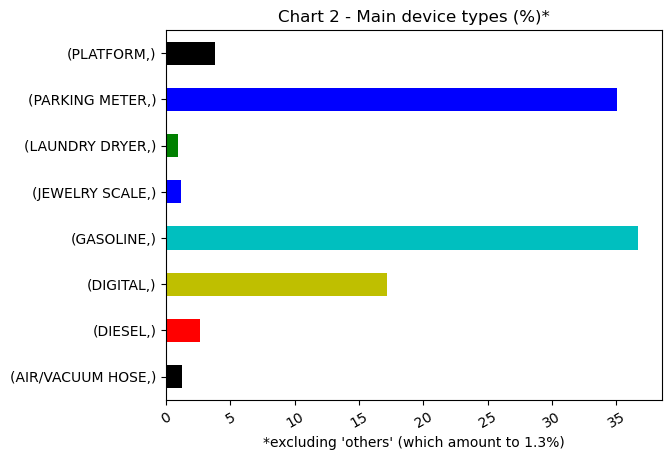

In [58]:
device_type_sel=devices.value_counts(['type'],normalize=True).head(8).sort_index(ascending=True)*100
chart2=device_type_sel.plot(kind='barh',color = list('krycbgb'))
chart2.set_title('Chart 2 - Main device types (%)*')
chart2.set_xlabel("*excluding 'others' (which amount to 1.3%)")
chart2.set_ylabel("")
chart2.tick_params(axis='x', rotation=30)

Now that the *type* attribute has been reasonably treated, we proceed to the *grade* attribute.  That is, we had done some work on it, indirectly, as a result of the propane scales.  It might be a good idea, since we did so many manipulations already, to get an updated description of the dataframe.

In [59]:
devices.describe(exclude=[np.number])

,type,group,make,model,serial_number,pump,grade,capacity,remarks
count,30774,30774,30319,8970,30592,17743,13431,6844,10350
unique,25,4,421,3286,16558,598,76,139,4697
top,GASOLINE,FUEL DISPENSER,GILBARCO,5090-1,NSN,1,R-87,30 LB,REJECTED
freq,11299,12215,6352,1501,481,1644,3526,5233,483


The grade attribute alone has 76 unique values, which is far more than group (4) and type (25) we've done initially. 


In [60]:
mask = devices.group=='FUEL DISPENSER'
devices.loc[mask].value_counts(["type","grade"])

type         grade      
GASOLINE     R-87           3525
             PL-89          1659
             PR-93          1333
             U-93           1144
             S-89            980
                            ... 
ETHANOL      E- 85             1
DIESEL       UNLEADED          1
             TURBO BLUE        1
             R-90              1
RACING FUEL  RACING FUEL       1
Length: 87, dtype: int64

Indeed, as may seen above, in the US market, there are many types of (mostly gasoline) fuel types and grades.
In addition, there are some typos which interfere with the data classification (such and PR- 93 and MG--89 which will need to be addressed...) 

*Let's try and employ the value_counts(with more than one grouping attribute) in this endeavour...*

In [61]:
num_devices_by_group_and_type=devices.value_counts(["group","type"])
num_devices_by_group_and_type

group           type                          
FUEL DISPENSER  GASOLINE                          11299
TIMING          PARKING METER                     10789
SCALE           DIGITAL                            5283
                PLATFORM                           1162
FUEL DISPENSER  DIESEL                              812
TIMING          AIR/VACUUM HOSE                     388
SCALE           JEWELRY SCALE                       368
TIMING          LAUNDRY DRYER                       275
SCALE           MISC. SCALE                          78
FUEL DISPENSER  KEROSENE                             60
SCALE           COUNTER                              51
                EVEN-BAL                             35
                HANGER                               34
FUEL DISPENSER  ETHANOL                              32
SCALE           COMPUTING                            22
TAPE            MISCELLANEOUS DEVICE                 18
SCALE           POSTAL                               14
 

*It is able to calculate the relative frequency (% amounts), by passing an appropriate flag, interesting...*

In [62]:
devices.value_counts(["group","type"],normalize=True)*100

group           type                          
FUEL DISPENSER  GASOLINE                          36.716059
TIMING          PARKING METER                     35.058816
SCALE           DIGITAL                           17.167089
                PLATFORM                           3.775915
FUEL DISPENSER  DIESEL                             2.638591
TIMING          AIR/VACUUM HOSE                    1.260805
SCALE           JEWELRY SCALE                      1.195815
TIMING          LAUNDRY DRYER                      0.893611
SCALE           MISC. SCALE                        0.253461
FUEL DISPENSER  KEROSENE                           0.194970
SCALE           COUNTER                            0.165724
                EVEN-BAL                           0.113732
                HANGER                             0.110483
FUEL DISPENSER  ETHANOL                            0.103984
SCALE           COMPUTING                          0.071489
TAPE            MISCELLANEOUS DEVICE               0.

In [63]:
digital_type=devices.type.str.contains('DIGITAL', na=False)
digital_devices=devices.loc[digital_type, ] 
digital_devices.describe(exclude=[np.number])


,type,group,make,model,serial_number,pump,grade,capacity,remarks
count,5283,5283,5283,166,5281,4609,42,5216,90
unique,1,1,106,97,4921,304,2,68,30
top,DIGITAL,SCALE,HOBART,SL-9000,NSN,D,DIGITAL,30 LB,REJECTED
freq,5283,5283,1058,10,51,511,41,4804,45


In [64]:
digital_devices.value_counts(["make","grade","capacity"])

make          grade    capacity
BIZERBA       DIGITAL  30 LB       16
AVERY BERKEL  DIGITAL  30 LB        4
HOBART        DIGITAL  30 LB        3
BERKEL        DIGITAL  30 LB        2
TORREY        DIGITAL  40 LB        2
NCR           DIGITAL  30 LB        2
AVERY BERKEL  DIGITAL  16 LB        1
NCR           2        30 LB        1
METTLER       DIGITAL  150 LB       1
                       10 LB        1
DIGI          DIGITAL  30 LB        1
GLOBE         DIGITAL  30 LB        1
CITIZEN       DIGITAL  1200 G       1
CAS           DIGITAL  30 LB        1
                       15 LB        1
                       10 LB        1
VFD           DIGITAL  30 LB        1
dtype: int64

In [65]:
scale_grade_typo=(devices.grade.str.strip()=='2')
scale_with_grade_2_typo=devices.loc[scale_grade_typo]
scale_with_grade_2_typo
#digital_devices

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
11156,11134,33154,DIGITAL,SCALE,NCR,NaN,48759155,2,2,30 LB,NaN,0


In [66]:
devices.loc[scale_grade_typo,"grade"]='DIGITAL'
digital_type=devices.type.str.contains('DIGITAL', na=False)
digital_devices=devices.loc[digital_type, ] 
digital_devices.describe(exclude=[np.number])


,type,group,make,model,serial_number,pump,grade,capacity,remarks
count,5283,5283,5283,166,5281,4609,42,5216,90
unique,1,1,106,97,4921,304,1,68,30
top,DIGITAL,SCALE,HOBART,SL-9000,NSN,D,DIGITAL,30 LB,REJECTED
freq,5283,5283,1058,10,51,511,42,4804,45


In [67]:
devices.value_counts(["make","grade","capacity"])

make       grade    capacity
METTLER    GENERIC  30 LB       201
                    150 LB      107
HOBART     GENERIC  30 LB        75
AND        GENERIC  300 LB       58
BRECKNELL  GENERIC  15 LB        39
                               ... 
AND        GENERIC  350 LB        1
METTLER    GENERIC  149 LB        1
DORON      GENERIC  100 LB        1
METTLER    GENERIC  100 LB        1
MAGELLAN   GENERIC  30 LB         1
Length: 235, dtype: int64

In [68]:
devices.value_counts(["type","grade"],normalize=True)*100

type      grade     
GASOLINE  R-87          26.245254
          PL-89         12.352021
          PR-93          9.924801
          U-93           8.517609
PLATFORM  GENERIC        8.391036
                          ...    
GASOLINE  R-97           0.007445
          KERO           0.007445
          MG--89         0.007445
          PR-97          0.007445
DIESEL    BIO-DIESEL     0.007445
Length: 95, dtype: float64

### Fuel grades text fixes

#### Diesel fuel (including home heating)

In [69]:
mask = devices.grade.str.contains('HI|HS', na=False)
devices.loc[mask, 'grade'] = 'HIGH SPEED DIESEL'
mask2 = devices.grade.str.contains('OFF', na=False)
devices.loc[mask2, 'grade'] = 'OFF-ROAD DIESEL'
mask3 = devices.grade.str.contains('OFF-ROAD DIESEL', na=False)
devices.loc[mask3, 'type'] = 'OFF-ROAD DIESEL (HOME HEATING)'
mask4 = devices.grade.str.contains('HIGH SPEED DIESEL', na=False)
devices.loc[mask4, 'type'] = 'DIESEL'
mask5=(devices.grade=='DIESEL')
devices.loc[mask5, 'type'] = 'DIESEL'



#### Racing fuel

In [70]:
racing_grade=devices.grade.str.contains('RACING', na=False)
devices.loc[racing_grade, 'grade'] = 'RACING FUEL'
devices.loc[racing_grade, 'type'] = 'RACING FUEL'

#### Ethanol

In [71]:
ethanol_grade=(devices.grade=='E- 85')
devices.loc[ethanol_grade, 'grade'] = 'E-85'

#### Gasoline (most important fuel type in the dataset)

For additional information, kindly refer to: 

https://www.eia.gov/energyexplained/gasoline/octane-in-depth.php

In [72]:

# "Regular (the lowest octane fuel–generally 87)"
regular='REGULAR 87'
regularplus='REGULAR 88'

# "Midgrade (the middle range octane fuel–generally 89–90)"
midgrade='MIDGRADE 89'
midgradeplus='MIDGRADE 90'

# "Premium (the highest octane fuel–generally 91–94)"
premiumbasic='PREMIUM 91'
premiumplus='PREMIUM 92'
extrapremium='PREMIUM 93'

devices['grade']=devices['grade'].replace({"UNL-":"U-"},regex=True)
devices['grade']=devices['grade'].replace({"UN-":"U-"},regex=True)
devices['grade']=devices['grade'].replace({"--":"-"},regex=True)
devices['grade']=devices['grade'].replace({" - ":"-"},regex=True)
devices['grade']=devices['grade'].replace({"- ":"-"},regex=True)
devices['grade']=devices['grade'].replace({"ZER0":"ZERO"},regex=True)
devices['grade']=devices['grade'].replace({"R87":"R-87"},regex=True)

devices['grade']=devices['grade'].replace({'KEROSENE':'KROSENE'},regex=True)
devices['grade']=devices['grade'].replace({'KERO':'KEROSENE'},regex=True)
# to compensate for whole word \b \b not working properly
devices['grade']=devices['grade'].replace({'KROSENE':'KEROSENE'},regex=True)

devices['grade']=devices['grade'].replace({"MG89":"MG-89"},regex=True)
devices['grade']=devices['grade'].replace({'SP-93':'PR-93'},regex=True)
devices['grade']=devices['grade'].replace({'VP-93':'PR-93'},regex=True)

devices['grade']=devices['grade'].replace({'R-87':regular},regex=True)
devices['grade']=devices['grade'].replace({'U-93':extrapremium},regex=True)
devices['grade']=devices['grade'].replace({'PR-93':extrapremium},regex=True)
devices['grade']=devices['grade'].replace({'PL-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'P-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'P-93':extrapremium},regex=True)
devices['grade']=devices['grade'].replace({'S-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'S-93':extrapremium},regex=True)
devices['grade']=devices['grade'].replace({'PR-91':premiumbasic},regex=True)
devices['grade']=devices['grade'].replace({'U-91':premiumbasic},regex=True)
devices['grade']=devices['grade'].replace({'MG-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'EX-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'MG-91':premiumbasic},regex=True)
devices['grade']=devices['grade'].replace({'E-88':regularplus},regex=True)
devices['grade']=devices['grade'].replace({'U-88':regularplus},regex=True)
devices['grade']=devices['grade'].replace({'PR-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'M-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({"\\b87\\b":regular},regex=True)
devices['grade']=devices['grade'].replace({'REGULAR REGULAR 87':regular},regex=True)
devices['grade']=devices['grade'].replace({'SPREMIUM':'PREMIUM'},regex=True)
devices['grade']=devices['grade'].replace({'SK-93':extrapremium},regex=True)
devices['grade']=devices['grade'].replace({'EZ-89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'UNLEADED':regular},regex=True)
devices['grade']=devices['grade'].replace({'R-90':midgradeplus},regex=True)
devices['grade']=devices['grade'].replace({'PL-91':premiumbasic},regex=True)
devices['grade']=devices['grade'].replace({'PL-91':premiumbasic},regex=True)
devices['grade']=devices['grade'].replace({'PR-92':premiumplus},regex=True)
devices['grade']=devices['grade'].replace({'U-REGULAR':'REGULAR'},regex=True)
devices['grade']=devices['grade'].replace({'89':midgrade},regex=True)
devices['grade']=devices['grade'].replace({'90':midgradeplus},regex=True)
# to compensate for whole word \b \b not working properly
devices['grade']=devices['grade'].replace({'MIDGRADE MIDGRADE':'MIDGRADE'},regex=True)

devices['grade']=devices['grade'].replace({'91':premiumbasic},regex=True)
devices['grade']=devices['grade'].replace({'93':extrapremium},regex=True)
# to compensate for whole word \b \b not working properly
devices['grade']=devices['grade'].replace({'PREMIUM PREMIUM':'PREMIUM'},regex=True)

devices['grade']=devices['grade'].replace({'PR-97':regular},regex=True)
devices['grade']=devices['grade'].replace({'R-97':regular},regex=True)

devices['grade']=devices['grade'].replace({'S-REGULAR 87':regular},regex=True)

devices['grade']=devices['grade'].replace({'UC-PREMIUM 93':extrapremium},regex=True)

In [73]:
devices.value_counts(["type","grade"],normalize=True)[0:80]*100

type                            grade            
GASOLINE                        REGULAR 87           26.476063
                                PREMIUM 93           25.679398
                                MIDGRADE 89          24.927407
PLATFORM                        GENERIC               8.391036
DIESEL                          DIESEL                5.733006
GASOLINE                        PREMIUM 91            5.375624
                                E-85                  0.617973
KEROSENE                        KEROSENE              0.431837
GASOLINE                        REGULAR 88            0.342491
DIGITAL                         DIGITAL               0.312709
PLATFORM                        PROPANE               0.245700
DIESEL                          HIGH SPEED DIESEL     0.215918
ETHANOL                         E-85                  0.201027
GASOLINE                        U-15                  0.163800
OFF-ROAD DIESEL (HOME HEATING)  OFF-ROAD DIESEL       0.126573
GASOL

In [74]:
grade_93=devices.grade.str.contains('93', na=False)
devices.loc[grade_93].value_counts(["type","grade"])

type      grade     
GASOLINE  PREMIUM 93    3449
DIESEL    PREMIUM 93       2
ETHANOL   PREMIUM 93       2
KEROSENE  PREMIUM 93       1
dtype: int64

In [75]:
devices.loc[grade_93, 'type'] = 'GASOLINE'
devices.loc[grade_93].value_counts(["type","grade"])

type      grade     
GASOLINE  PREMIUM 93    3454
dtype: int64

In [76]:
grade_92=devices.grade.str.contains('92', na=False)
devices.loc[grade_92].value_counts(["type","grade"])

type      grade     
GASOLINE  PREMIUM 92    8
dtype: int64

In [77]:
grade_91=devices.grade.str.contains('91', na=False)
devices.loc[grade_91].value_counts(["type","grade"])


type      grade          
GASOLINE  PREMIUM 91         722
PLATFORM  46PREMIUM 91310      1
dtype: int64

In [78]:
record_to_fix=devices.grade.str.contains('46PREMIUM', na=False)
devices.loc[record_to_fix]

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
11918,11904,31975,PLATFORM,SCALE,METTLER,NaN,4693842,CH,46PREMIUM 91310,30 LB,NaN,1


In [79]:
devices[devices['type']=='PLATFORM'].grade.unique()

array(['GENERIC', 'PROPANE', 'DIGITAL', '46PREMIUM 91310'], dtype=object)

In [80]:
devices.loc[record_to_fix,'grade']='DIGITAL'


In [81]:
grade_90=devices.grade.str.contains('90', na=False)
devices.loc[grade_90].value_counts(["type","grade"])

type      grade      
GASOLINE  MIDGRADE 90    7
DIESEL    MIDGRADE 90    1
dtype: int64

In [82]:
grade_89=devices.grade.str.contains('89', na=False)
devices.loc[grade_89].value_counts(["type","grade"])

type      grade      
GASOLINE  MIDGRADE 89    3348
DIESEL    MIDGRADE 89       3
dtype: int64

*3 records need to be fixed.*

In [83]:
mask=(devices.grade.str.contains('89', na=True)) & (devices.type == 'DIESEL')
devices.loc[mask,'grade']='DIESEL'
grade_89=devices.grade.str.contains('89', na=False)
devices.loc[grade_89].value_counts(["type","grade"])

type      grade      
GASOLINE  MIDGRADE 89    3348
dtype: int64

In [84]:
grade_88=devices.grade.str.contains('88', na=False)
devices.loc[grade_88].value_counts(["type","grade"])

type      grade     
GASOLINE  REGULAR 88    46
ETHANOL   REGULAR 88     2
dtype: int64

In [85]:
mask=(devices.grade.str.contains('REGULAR 88', na=True) & (devices.type == 'ETHANOL'))
devices.loc[mask]

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
23847,26793,31801,ETHANOL,FUEL DISPENSER,GILBARCO,NaN,443456,7,REGULAR 88,NaN,NaN,0
23848,26794,31801,ETHANOL,FUEL DISPENSER,GILBARCO,NaN,443456,8,REGULAR 88,NaN,NaN,0


In [86]:
devices.loc[mask,'grade']='REGULAR 88'
devices.loc[mask,'type']='GASOLINE'

grade_88=devices.grade.str.contains('88', na=False)
devices.loc[grade_88].value_counts(["type","grade"])

type      grade     
GASOLINE  REGULAR 88    48
dtype: int64

2 records adjusted, since there is E-85 (shown a little further below) to denote Ethanol.

In [87]:
grade_87=devices.grade.str.contains('87', na=False)
devices.loc[grade_87].value_counts(["type","grade"])

type      grade     
GASOLINE  REGULAR 87    3556
DIESEL    REGULAR 87       1
KEROSENE  REGULAR 87       1
dtype: int64

*2 records need to be fixed.*

In [88]:
mask=(devices.grade.str.contains('REGULAR 87', na=True)) & ((devices.type == 'KEROSENE') | (devices.type=='DIESEL'))
devices.loc[mask]

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
2072,2057,31886,KEROSENE,FUEL DISPENSER,GILBARCO,NaN,74686,8,REGULAR 87,NaN,NaN,0
9906,9882,30422,DIESEL,FUEL DISPENSER,TUTHILL,NaN,248196,NaN,REGULAR 87,NaN,REJECTED,0


In [89]:
devices.loc[mask,'type']='GASOLINE'

In [90]:
grade_87=devices.grade.str.contains('87', na=False)
devices.loc[grade_87].value_counts(["type","grade"])

type      grade     
GASOLINE  REGULAR 87    3558
dtype: int64

*Yes, fixed octane 87*.  We'll leave the other grades as they are,  They seem ok.

In [91]:
grade_85=devices.grade.str.contains('85', na=False)
devices.loc[grade_85].value_counts(["type","grade"])

type      grade
GASOLINE  E-85     83
ETHANOL   E-85     27
GASOLINE  FL-85    10
dtype: int64

In [92]:
grade_15=devices.grade.str.contains('15', na=False)
devices.loc[grade_15].value_counts(["type","grade"])

type      grade
GASOLINE  U-15     22
          E-15     16
DIESEL    E-15      2
dtype: int64

In [93]:
devices['grade'].sort_values().unique()

array(['BIO-DIESEL', 'DEF', 'DIESEL', 'DIGITAL', 'E-15', 'E-85', 'E-ZERO',
       'FL-85', 'GENERIC', 'HEATING FUEL', 'HIGH SPEED DIESEL',
       'KEROSENE', 'MIDGRADE 89', 'MIDGRADE 90', 'OFF-ROAD DIESEL',
       'POSTAL', 'PREMIUM 91', 'PREMIUM 92', 'PREMIUM 93', 'PROPANE',
       'RACING FUEL', 'REGULAR 87', 'REGULAR 88', 'TURBO BLUE', 'U-15',
       'WHEEL', nan], dtype=object)

In [94]:
len(devices['grade'].unique())

27

In [95]:
devices.describe(exclude=[np.number])

,type,group,make,model,serial_number,pump,grade,capacity,remarks
count,30774,30774,30319,8970,30592,17743,13431,6844,10350
unique,24,4,421,3286,16558,598,26,139,4697
top,GASOLINE,FUEL DISPENSER,GILBARCO,5090-1,NSN,1,REGULAR 87,30 LB,REJECTED
freq,11285,12215,6352,1501,481,1644,3558,5233,483


### We are down to 26 unique grade types, after the adjustments were made.

### Device manufactures

In [96]:
devices.value_counts(["type","make"],normalize=True)[0:60]*100

type             make                   
PARKING METER    DUNCAN INDUSTRIES          19.921501
GASOLINE         GILBARCO                   19.532306
                 WAYNE                      16.009763
PARKING METER    CALE AMERICA                4.070055
DIGITAL          HOBART                      3.489561
                 DATALOGIC                   2.856295
                 NCR                         2.575942
                 METTLER                     2.575942
PARKING METER    POM APM                     1.942676
                 IPS GROUP                   1.487516
                 DUNCAN SOLUTIONS            1.286322
                 DUNCAN EAGLE                1.263234
DIESEL           GILBARCO                    1.217059
PLATFORM         METTLER                     1.197269
DIESEL           WAYNE                       1.170883
PARKING METER    IPS GROUP INC               1.088426
                 DUNCAN SOLUTIONS INC        0.982882
GASOLINE         TOKHEIM                 

In [97]:
cale_make = devices.make.str.contains('CALE', na=False)
devices.loc[cale_make, 'make'] = 'CALE'

cale_make = devices.make.str.contains('DUNCAN', na=False)
devices.loc[cale_make, 'make'] = 'DUNCAN'

devices.value_counts(["make","type"],normalize=True)[0:20]*100

make           type         
DUNCAN         PARKING METER    23.968469
GILBARCO       GASOLINE         19.532306
WAYNE          GASOLINE         16.009763
CALE           PARKING METER     5.231043
HOBART         DIGITAL           3.489561
DATALOGIC      DIGITAL           2.856295
NCR            DIGITAL           2.575942
METTLER        DIGITAL           2.575942
POM APM        PARKING METER     1.942676
IPS GROUP      PARKING METER     1.487516
GILBARCO       DIESEL            1.217059
METTLER        PLATFORM          1.197269
WAYNE          DIESEL            1.170883
IPS GROUP INC  PARKING METER     1.088426
TOKHEIM        GASOLINE          0.811372
CAS            DIGITAL           0.775092
TEC            DIGITAL           0.656354
AND            JEWELRY SCALE     0.514529
ZEBRA          DIGITAL           0.471651
BIZERBA        DIGITAL           0.418879
dtype: float64

In [98]:
#herehere

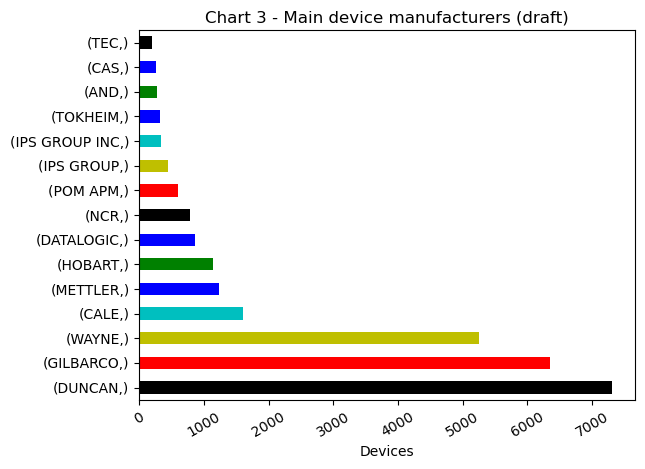

In [99]:
most_prevalent_device_manufacturers=devices.value_counts(["make"]).head(15)
chart3=most_prevalent_device_manufacturers.plot(kind='barh',color = list('krycbgb'))
chart3.set_title('Chart 3 - Main device manufacturers (draft)')
chart3.set_xlabel("Devices")
chart3.set_ylabel("")
chart3.tick_params(axis='x', rotation=30)

Graphically, we notice that *IPS Group* appears twice.  This should be fixed.

In [100]:
ips_make = devices.make.str.contains('IPS GROUP', na=False)
devices.loc[ips_make, 'make'] = 'IPS GROUP'


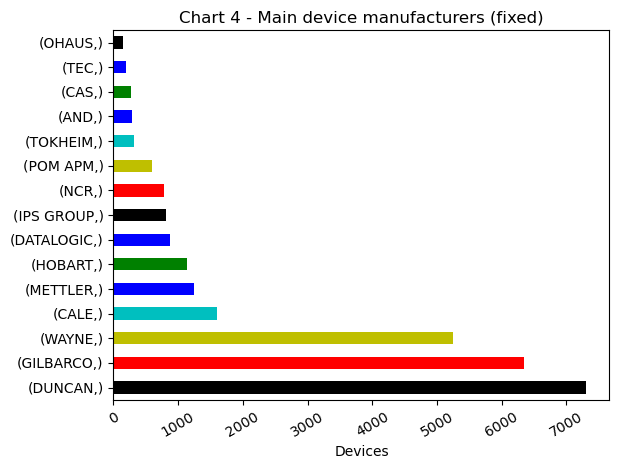

In [101]:

most_prevalent_device_manufacturers=devices.value_counts(["make"]).head(15)
chart4=most_prevalent_device_manufacturers.plot(kind='barh',color = list('krycbgb'))
chart4.set_title('Chart 4 - Main device manufacturers (fixed)')
chart4.set_xlabel("Devices")
chart4.set_ylabel("")
chart4.tick_params(axis='x', rotation=30)

In [102]:
devices["capacity"]=uppercased(devices, "capacity")
devices.value_counts(["group","capacity"])

group  capacity
SCALE  30 LB       5233
       15 LB        161
       150 LB       158
       1200 G       149
       1000 LB      145
                   ... 
       30             1
       299.5 KG       1
       2610 G         1
       25 KG          1
       BKUP           1
Length: 137, dtype: int64

In [103]:
most_common_capacities=devices.value_counts("capacity",normalize=True).head(9)*100
print(sum(most_common_capacities))
most_common_capacities

90.41496201052016


capacity
30 LB      76.461134
15 LB       2.352425
150 LB      2.308591
1200 G      2.177089
1000 LB     2.118644
300 LB      1.738749
10 LB       1.446523
500 LB      1.022794
40 LB       0.789012
dtype: float64

In [104]:
devices.value_counts(["group","pump"])[0:60]

group           pump
FUEL DISPENSER  2       1375
                1       1373
                4       1328
                3       1328
                5       1126
                6       1120
                8        970
                7        967
SCALE           D        513
FUEL DISPENSER  9        438
SCALE           MT       425
FUEL DISPENSER  10       418
                11       360
                12       354
SCALE           1        266
                2        257
FUEL DISPENSER  13       223
                14       222
SCALE           BK       221
                3        212
                4        171
                DELI     163
FUEL DISPENSER  15       159
                16       157
SCALE           5        151
                PF       143
                SF       129
                6        125
                PR       123
                R         95
                K         94
                CH        87
                7         86
                8     

In [105]:
non_fuel_devices_mask=devices.group!='FUEL DISPENSER'
devices.loc[non_fuel_devices_mask].value_counts(["group","pump"])[0:60] 

group   pump   
SCALE   D          513
        MT         425
        1          266
        2          257
        BK         221
        3          212
        4          171
        DELI       163
        5          151
        PF         143
        SF         129
        6          125
        PR         123
        R           95
        K           94
        CH          87
        7           86
        8           70
        HF          67
        9           65
        CF          62
        PROD        59
        10          58
        SM          54
        CS          48
        BR          45
        MEAT        44
        KIT         43
        11          42
        12          38
        13          31
        ROT         31
TIMING  A-1         30
SCALE   BAKE        30
        14          26
        CAFE        26
        PRO         25
        16          25
        15          24
        CURB        24
        17          22
        MT WRAP     20
        18        

In [106]:
scales_mask=devices.group=='SCALE'
scales=devices.loc[scales_mask,]
scales.pump.sort_values().unique()

array(['1', '10', '101', '103', '105', '106', '11', '12', '129', '13',
       '13-BEER', '130', '132', '133', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '2ND RM', '3', '30', '31', '32', '33', '34', '35', '36', '37',
       '38', '39', '4', '402', '403', '404', '405', '407', '408', '43',
       '44', '45', '46', '47', '48', '49', '5', '50', '501', '503', '504',
       '505', '51', '515', '516', '52', '53', '54', '55', '56', '6', '7',
       '71', '72', '73-CIG', '75', '76', '77', '8', '9', '9/OUT', 'A',
       'ACE', 'AMB ROOM', 'APPLE ', 'ASIAN', 'AUTO', 'B', 'B & W', 'B&W',
       'BACK', 'BACK KIT', 'BACK ROOM', 'BACKUP', 'BAG', 'BAK', 'BAKE',
       'BAKERY', 'BANANAS', 'BEAUTY', 'BEER', 'BEV', 'BF', 'BK',
       'BK KIOSK', 'BK RM', 'BKUP', 'BLK', 'BLUE SKY', 'BR', 'BREAK',
       'BULK', 'BULK KIOSK', 'BULK1', 'BULK2', 'BURG', 'BW', 'C',
       'C SIDE', 'C&J', 'CAB', 'CAF', 'CAFE', 'CAFE1', 'CAFE2', 'CAN',
  

In [107]:
timers_mask=devices.group=='TIMING'
timers=devices.loc[timers_mask,]
timers.pump.sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '1A', '1B', '2', '21',
       '22', '23', '25', '26', '27', '2A', '3', '30', '36', '37', '3A',
       '3B', '4', '42NDST 0402', '4A', '4B', '5', '5A', '5THAVE 0701',
       '5THAVE 0702', '5THAVE 0704', '5THAVE 0901', '5THAVE 0902',
       '5THAVE 1002', '5THAVE 1101', '5THAVE 1102', '5THAVE 1201',
       '5THAVE 1202', '5THAVE 1302', '5THAVE 1303', '5THAVE 1304',
       '5THAVE 1401', '5THAVE 1402', '5THAVE 1403', '6', '6A', '6B', '7',
       '70', '72', '73', '74', '75', '77', '7A', '7B', '8', '8A', '9',
       'A-1', 'A-2', 'A-6', 'AIR', 'BARTLETT 5801', 'BARTLETT 5802',
       'BAUMBV 4801', 'BAUMBV 5001', 'BAUMBV 5002', 'BAUMBV 5102',
       'BAUMBV 5104', 'BAUMBV 5202', 'BEACON 5702', 'BEDFRD 1201',
       'BOYDST 0001', 'BW2', 'BW4', 'BW6', 'CENTRE 4701', 'CENTRE 4703',
       'CENTRE 4705', 'CENTRE 4901', 'CENTRE 4905', 'CENTRE 5001',
       'CENTRE 5101', 'CENTRE 5102', 'CENTRE 5202', 'CENTRE 5301',
       'CENTRE 5302', 'CENTRE 

## Inspections - CSV

In [108]:
inspections_fname="inspections.csv"
inspections_full_path=os.path.join(import_dir_path,inspections_fname)
inspections = pd.read_csv(inspections_full_path)

If we didn't get any errors, we should be able to "query" information about the data, just to double check that the information was succesfully imported.  

In [109]:
print("Devices data rows and columns: {}".format(inspections.shape))

Devices data rows and columns: (97443, 6)


In [110]:
inspections.head(20)

,inspection_id,store_id,device_id,date,result,reinspection
0,38362,30460,5445,2016-05-03,Pass,No
1,47971,31879,9013,2016-01-07,Pass,No
2,47972,30416,6893,2016-01-07,Pass,Yes
3,47973,31699,8346,2016-01-07,Pass,Yes
4,47974,32341,14011,2016-01-07,Pass,No
5,47975,30413,11190,2016-01-07,Pass,No
6,47976,32240,12991,2016-01-07,Pass,No
7,47977,32225,14115,2016-01-07,Pass,No
8,47978,32199,12611,2016-01-07,Pass,No
9,47979,32200,13263,2016-01-07,Pass,No


In [111]:
inspections.describe(exclude=[np.number])

,date,result,reinspection
count,97443,97443,97443
unique,1038,2,2
top,2019-07-30,Pass,No
freq,1465,93747,93138


In [112]:
inspections.result.value_counts()

Pass    93747
Fail     3696
Name: result, dtype: int64

In [113]:
device_inspections = pd.concat([devices, inspections], axis=1, join="inner")

In [114]:
device_inspections.describe(exclude=[np.number])

,type,group,make,model,serial_number,pump,grade,capacity,remarks,date,result,reinspection
count,30774,30774,30319,8970,30592,17743,13431,6844,10350,30774,30774,30774
unique,24,4,377,3286,16558,598,26,137,4697,318,2,2
top,GASOLINE,FUEL DISPENSER,DUNCAN,5090-1,NSN,1,REGULAR 87,30 LB,REJECTED,2017-04-27,Pass,No
freq,11285,12215,7303,1501,481,1644,3558,5233,483,1279,29680,29432


In [115]:
device_inspections.result.sort_values().unique()

array(['Fail', 'Pass'], dtype=object)

In [116]:
device_inspections['result']=device_inspections['result'].replace({'Pass':1},regex=True)
device_inspections['result']=device_inspections['result'].replace({'Fail':0},regex=True)
device_inspections.result.sort_values().unique()

array([0, 1])

In [117]:
device_inspections.date

0        2016-05-03
1        2016-01-07
2        2016-01-07
3        2016-01-07
4        2016-01-07
            ...    
30773    2017-06-20
30774    2017-06-20
30775    2017-06-20
30776    2017-06-20
30777    2017-06-20
Name: date, Length: 30774, dtype: object

In [118]:
device_inspections.value_counts(["group","type"])

group           type                          
FUEL DISPENSER  GASOLINE                          11285
TIMING          PARKING METER                     10789
SCALE           DIGITAL                            5283
                PLATFORM                           1162
FUEL DISPENSER  DIESEL                              820
TIMING          AIR/VACUUM HOSE                     388
SCALE           JEWELRY SCALE                       368
TIMING          LAUNDRY DRYER                       275
SCALE           MISC. SCALE                          78
FUEL DISPENSER  KEROSENE                             58
SCALE           COUNTER                              51
                EVEN-BAL                             35
                HANGER                               34
FUEL DISPENSER  ETHANOL                              28
SCALE           COMPUTING                            22
TAPE            MISCELLANEOUS DEVICE                 18
FUEL DISPENSER  OFF-ROAD DIESEL (HOME HEATING)       18
S

In [119]:
device_inspections.value_counts(["group","type","make"],normalize=True).head(15)*100

group           type           make     
TIMING          PARKING METER  DUNCAN       23.968469
FUEL DISPENSER  GASOLINE       GILBARCO     19.532306
                               WAYNE        16.009763
TIMING          PARKING METER  CALE          5.231043
SCALE           DIGITAL        HOBART        3.489561
                               DATALOGIC     2.856295
TIMING          PARKING METER  IPS GROUP     2.688083
SCALE           DIGITAL        NCR           2.575942
                               METTLER       2.575942
TIMING          PARKING METER  POM APM       1.942676
FUEL DISPENSER  DIESEL         GILBARCO      1.217059
SCALE           PLATFORM       METTLER       1.197269
FUEL DISPENSER  DIESEL         WAYNE         1.170883
                GASOLINE       TOKHEIM       0.811372
SCALE           DIGITAL        CAS           0.775092
dtype: float64

In [120]:
failed_inspections_by_group=100-device_inspections.groupby('group')['result'].aggregate(lambda x: x.sum() / len(x))*100
failed_inspections_by_group

group
FUEL DISPENSER    3.905035
SCALE             4.119058
TAPE              0.000000
TIMING            2.837932
Name: result, dtype: float64

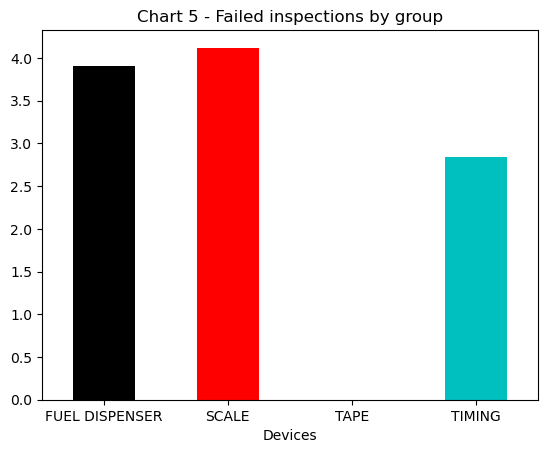

In [121]:
chart5=failed_inspections_by_group.plot(kind='bar',color = list('krycbgb'))
chart5.set_title('Chart 5 - Failed inspections by group')
chart5.set_xlabel("Devices")
chart5.set_ylabel("")
chart5.tick_params(axis='x', rotation=0)


*The tape device group passed all inspections.*

In [122]:
failed_inspection_reciprocal_rates=(1/failed_inspections_by_group*100).sort_index(ascending=True)
failed_inspection_reciprocal_rates

group
FUEL DISPENSER    25.607966
SCALE             24.277397
TAPE                    inf
TIMING            35.236923
Name: result, dtype: float64

On average, *scales* are the most *problematic* devices.  They approximately fail once every 24 inspections.  *Fuel dispensers* closely follow.

In [123]:
failed_inspections_by_type=100-device_inspections.groupby('type')['result'].aggregate(lambda x: x.sum() / len(x))*100

In [124]:
types_with_no_inspection_failures=failed_inspections_by_type[failed_inspections_by_type==0]
types_with_no_inspection_failures

type
BEAM                              0.0
DRUM                              0.0
ETHANOL                           0.0
MISCELLANEOUS DEVICE              0.0
NON-COMMERCIAL                    0.0
OFF-ROAD DIESEL (HOME HEATING)    0.0
RACING FUEL                       0.0
TAPE MEASURE                      0.0
WHEEL                             0.0
Name: result, dtype: float64

In [125]:
mask=devices.type.isin(types_with_no_inspection_failures.index)
device_types_without_inspection_failures=devices.loc[mask]
device_types_without_inspection_failures

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
249,248,30433,OFF-ROAD DIESEL (HOME HEATING),FUEL DISPENSER,WAYNE,NaN,099610,7,OFF-ROAD DIESEL,NaN,NaN,0
593,592,31598,OFF-ROAD DIESEL (HOME HEATING),FUEL DISPENSER,WAYNE,NaN,07067,8,OFF-ROAD DIESEL,NaN,NaN,0
594,593,31598,OFF-ROAD DIESEL (HOME HEATING),FUEL DISPENSER,WAYNE,NaN,07067,9,OFF-ROAD DIESEL,NaN,NaN,0
1529,1515,31877,RACING FUEL,FUEL DISPENSER,WAYNE,NaN,47446,3,RACING FUEL,NaN,NaN,0
1773,1759,30431,OFF-ROAD DIESEL (HOME HEATING),FUEL DISPENSER,TOKHEIM,NaN,43077,5,OFF-ROAD DIESEL,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30602,30910,31612,ETHANOL,FUEL DISPENSER,GILBARCO,NaN,109141,5,E-ZERO,NaN,NaN,0
30698,31378,40620,BEAM,SCALE,NaN,NaN,NaN,NaN,NaN,NaN,NLFT,0
30699,31379,40621,BEAM,SCALE,NaN,NaN,NaN,NaN,NaN,NaN,NLFT,0
30770,31263,31757,DRUM,SCALE,HOBART,NaN,1126479,D,NaN,30 LB,NaN,0


In [126]:
device_types_without_inspection_failures.value_counts(["group","type"])

group           type                          
FUEL DISPENSER  ETHANOL                           28
                OFF-ROAD DIESEL (HOME HEATING)    18
TAPE            MISCELLANEOUS DEVICE              18
SCALE           BEAM                              11
                DRUM                              10
                TAPE MEASURE                      10
                WHEEL                             10
FUEL DISPENSER  RACING FUEL                        6
SCALE           NON-COMMERCIAL                     1
dtype: int64

In [127]:
types_with_inspection_failures=failed_inspections_by_type[failed_inspections_by_type>0]
types_with_inspection_failures.sort_values(ascending=False)

type
POSTAL             7.142857
HANGER             5.882353
EVEN-BAL           5.714286
MISC. SCALE        5.128205
JEWELRY SCALE      4.891304
COMPUTING          4.545455
DIGITAL            4.145372
GASOLINE           3.978733
PLATFORM           3.786575
KEROSENE           3.448276
DIESEL             3.170732
PARKING METER      2.891834
LAUNDRY DRYER      2.545455
COUNTER            1.960784
AIR/VACUUM HOSE    1.546392
Name: result, dtype: float64

In [128]:
devices[devices.type=='POSTAL']

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
12528,12520,32184,POSTAL,SCALE,MEDA DATA,NaN,32331,NaN,NaN,5 LB,NaN,0
12769,12765,32849,POSTAL,SCALE,F&P,NaN,7235009,NaN,NaN,5 LB,NaN,0
13299,13299,31349,POSTAL,SCALE,PITNEY BOWES,NaN,0044905,NaN,NaN,NaN,NaN,0
13511,13515,30220,POSTAL,SCALE,PITNEY BOWES,NaN,0004597,NaN,NaN,5 LB,NaN,1
14188,14202,30318,POSTAL,SCALE,OFFICE DEPOT,NaN,0904,NaN,POSTAL,11 LB,NaN,1
14197,14211,31536,POSTAL,SCALE,STAMPS.COM,NaN,2500,NaN,NaN,25 LB,NaN,1
14205,14219,31961,POSTAL,SCALE,PELOUZE,NaN,2806,NaN,NaN,5 LB,NaN,1
14206,14220,32025,POSTAL,SCALE,HASLER,NaN,IM286,NaN,NaN,5 LB,NaN,1
14211,14225,32059,POSTAL,SCALE,PITNEY BOWES,N-500,319718,NaN,NaN,5 LB,NaN,0
14218,14232,32206,POSTAL,SCALE,ESCALI,NaN,P1156,NaN,NaN,175 OZ,NaN,0


In [129]:
devices[devices.type=='HANGER']

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
10572,10545,30692,HANGER,SCALE,HANSON,NaN,148322,UP,NaN,60 LB,NaN,0
10849,10824,32216,HANGER,SCALE,DETECTO,NaN,783596,BR,NaN,20 LB,NaN,0
10850,10825,32216,HANGER,SCALE,DETECTO,NaN,551274,B,NaN,20 LB,NaN,0
11841,11825,31955,HANGER,SCALE,CHATILLON,NaN,86030A2,BULK,NaN,20 LB,NaN,1
12336,12325,32290,HANGER,SCALE,CHATILLON,NaN,5515,CANDY,NaN,10 LB,NaN,1
13218,13219,31635,HANGER,SCALE,DETECTO,NaN,15274,NaN,NaN,NaN,NaN,0
13256,13257,31501,HANGER,SCALE,DETECTO,NaN,528889,NaN,NaN,20 LB,NaN,1
14301,14316,30268,HANGER,SCALE,HANSON,NaN,842,NaN,NaN,20 LB,NaN,0
14302,14317,30268,HANGER,SCALE,PENN,NaN,NSN,NaN,NaN,20 LB,NaN,1
14474,15019,32308,HANGER,SCALE,CHATILLON,NaN,86030A2,SF,NaN,20 LB,NaN,1


In [130]:
devices[devices.type=='EVEN-BAL']

,id,store_id,type,group,make,model,serial_number,pump,grade,capacity,remarks,deleted
10593,10566,32243,EVEN-BAL,SCALE,ELECTROGRAM,NaN,NSN,S,NaN,1 LB,NaN,0
10902,10876,32639,EVEN-BAL,SCALE,OHAUS,NaN,122333,NaN,NaN,500 G,NaN,0
10946,10922,32270,EVEN-BAL,SCALE,DETECTO,NaN,NSN,CAB,NaN,10 LB,NaN,1
10947,10923,32270,EVEN-BAL,SCALE,PENN,NaN,NSN,CAB,NaN,10 LB,NaN,1
11013,10989,30248,EVEN-BAL,SCALE,DETECTO,NaN,NSN,NaN,NaN,30 LB,NaN,0
11014,10990,30248,EVEN-BAL,SCALE,EXACT,NaN,108182,NaN,NaN,10 LB,NaN,1
11015,10991,30248,EVEN-BAL,SCALE,DETECTO,NaN,NSN,NaN,NaN,10 LB,NaN,0
11016,10992,30248,EVEN-BAL,SCALE,DETECTO,NaN,97704,NaN,NaN,10 LB,NaN,1
11017,10993,30248,EVEN-BAL,SCALE,DETECTO,NaN,80739,NaN,NaN,10 LB,NaN,1
11018,10994,30248,EVEN-BAL,SCALE,EXACT,NaN,72319,NaN,NaN,10 LB,NaN,0


### Looking at the data this way, we can conclude that scales are the kind of device which most often fails the inspections.

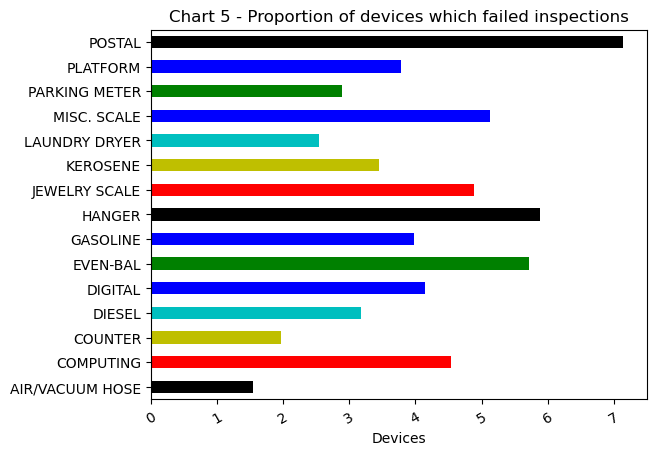

In [131]:
chart5=types_with_inspection_failures.plot(kind='barh',color = list('krycbgb'))
chart5.set_title('Chart 5 - Proportion of devices which failed inspections')
chart5.set_xlabel("Devices")
chart5.set_ylabel("")
chart5.tick_params(axis='x', rotation=30)


In [132]:
device_inspections.value_counts("date")

date
2017-04-27    1279
2017-02-03    1242
2016-05-06    1151
2017-06-20     764
2017-05-22     652
              ... 
2016-07-22       1
2016-12-16       1
2017-03-31       1
2017-04-21       1
2016-04-08       1
Length: 318, dtype: int64

In [133]:
inspection_results_by_date=(1-device_inspections.groupby('date')['result'].aggregate(lambda x: x.sum() / len(x)))*100

In [134]:
failed_inspection_dates_and_proportions=inspection_results_by_date[inspection_results_by_date>0]

<AxesSubplot:ylabel='date'>

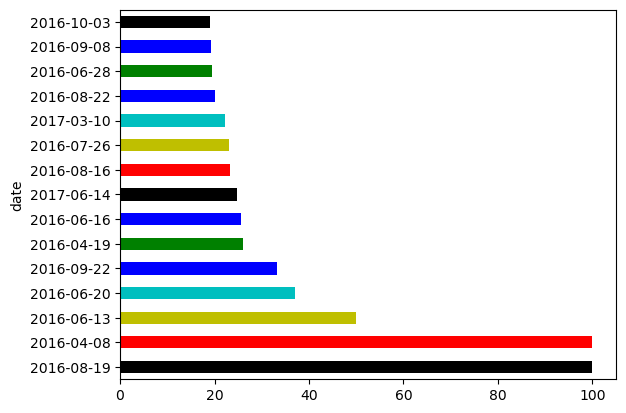

In [135]:
failed_inspection_dates_and_proportions.sort_values(ascending=False).head(15).plot(kind='barh',color = list('krycbgb'))

In [136]:
inspections_results_by_make=100-device_inspections.groupby('make')['result'].aggregate(lambda x: x.sum() / len(x))*100
failed_inspections_by_make=inspections_results_by_make[inspections_results_by_make>0]
failed_inspections_by_make

make
AH                             100.000000
AIR SERV INC                    33.333333
AND                              4.982206
AVERY                           50.000000
AVERY BERKEL                    10.000000
AWD                             50.000000
BERKEL                           7.142857
BIZERBA                          6.428571
BRECKNELL                        8.000000
CALE                             4.044804
CAS                              6.818182
CHATILLON                        5.555556
CHISWICK                       100.000000
CITIZEN                          4.761905
DATALOGIC                        3.344867
DETECTO                          2.678571
DEXTER EXPRESS                   4.000000
DEXTER STACK DRYERS LAUNDRY     26.666667
DIGI                             2.205882
DUNCAN                           2.204573
EASY WEIGH                       5.882353
ECS                             16.666667
ESI                             50.000000
EXACT WEIGH                  

In [137]:
failed_inspections_by_make.sort_values(ascending=False)

make
AH                             100.000000
CHISWICK                       100.000000
NO NAME                        100.000000
AVERY                           50.000000
AWD                             50.000000
MIC                             50.000000
LUFKIN                          50.000000
EXACT WEIGH                     50.000000
ESI                             50.000000
AIR SERV INC                    33.333333
DEXTER STACK DRYERS LAUNDRY     26.666667
UWEI                            20.000000
ICL                             20.000000
GEMORO                          16.666667
ECS                             16.666667
HOWE                            16.666667
PSC                             11.904762
RICE LAKE                       11.111111
MARK VII EQUIPMENT CO           11.111111
AVERY BERKEL                    10.000000
TRINER                          10.000000
BRECKNELL                        8.000000
SCHLUMBERGER                     7.500000
BERKEL                       

#### Inspection failure rates by device manufactures should be taken with a grain of salt, given the number of inspections performed.

In [138]:
i=0
for maker in failed_inspections_by_make.index: 
     rate=failed_inspections_by_make[i]
     num_inspections=len(device_inspections[device_inspections.make==maker])
     print("{} (n = {}) rate = {}%".format(maker,num_inspections,round(rate,2)))
  #  failed_inspections_by_make
     i=i+1


AH (n = 1) rate = 100.0%
AIR SERV INC (n = 3) rate = 33.33%
AND (n = 281) rate = 4.98%
AVERY (n = 2) rate = 50.0%
AVERY BERKEL (n = 80) rate = 10.0%
AWD (n = 2) rate = 50.0%
BERKEL (n = 98) rate = 7.14%
BIZERBA (n = 140) rate = 6.43%
BRECKNELL (n = 75) rate = 8.0%
CALE (n = 1607) rate = 4.04%
CAS (n = 264) rate = 6.82%
CHATILLON (n = 18) rate = 5.56%
CHISWICK (n = 1) rate = 100.0%
CITIZEN (n = 21) rate = 4.76%
DATALOGIC (n = 867) rate = 3.34%
DETECTO (n = 112) rate = 2.68%
DEXTER EXPRESS (n = 25) rate = 4.0%
DEXTER STACK DRYERS LAUNDRY (n = 15) rate = 26.67%
DIGI (n = 136) rate = 2.21%
DUNCAN (n = 7303) rate = 2.2%
EASY WEIGH (n = 17) rate = 5.88%
ECS (n = 6) rate = 16.67%
ESI (n = 4) rate = 50.0%
EXACT WEIGH (n = 2) rate = 50.0%
FAIRBANKS (n = 77) rate = 2.6%
GEMORO (n = 6) rate = 16.67%
GILBARCO (n = 6352) rate = 4.9%
HOBART (n = 1142) rate = 4.2%
HOWE (n = 6) rate = 16.67%
ICL (n = 10) rate = 20.0%
IPS GROUP (n = 815) rate = 6.5%
ISHIDA (n = 73) rate = 4.11%
KUBOTA (n = 32) rate = 6

In [139]:
devices_R_fname="devices_R.csv"
devices_R_fullpath=os.path.join(export_dir_path,devices_R_fname)
devices.to_csv(devices_R_fullpath)

## Conclusion

With the devices data reasonably curated and exported to CSV, this notebook is concluded.  

We explored the main device groups, types, grades and manufacturers and made comments as we went along.